In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA**

1. Reading Data
2. Reading first 5 rows

In [311]:
df=pd.read_csv('/content/train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


1. Checking null values in data

In [312]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [313]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

Filling null with the mean value of particular column

In [314]:
df['N_BEDROOM'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [315]:
# N_BEDROOM having only 1 missing value. filling it with mode
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace=True)

In [316]:
df['N_BEDROOM']=df['N_BEDROOM'].astype('int')

In [317]:
df['N_BATHROOM'].unique()

array([ 1.,  2., nan])

In [318]:
# N_BATHROOM having only 5 missing value. filling it with mode
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)

In [319]:
df['N_BATHROOM']=df['N_BATHROOM'].astype('int')

In [320]:
# 'QS_OVERALL' is masked data. we do not know how it came. filling 48 missing values with mean of all the values
df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean(),inplace=True)

In [321]:
# checking null values
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

**All null values have been filled properly**

1. DATA Cleaning:
 Removing PART_ID. It is not required for the further processing

In [322]:
del df['PRT_ID']
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [323]:
#checking other columns for incorrect entries
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [324]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [325]:
df['AREA']=df['AREA'].replace({'Karapakam':'Karapakkam', 'Ana Nagar':'Anna Nagar', 'Ann Nagar':'Anna Nagar', 'Chrompt':'Chrompet', 'Chrmpet':'Chrompet', 'Chormpet':'Chrompet', 'Adyr':'Adyar', 'Velchery':'Velachery', 'KKNagar':'KK Nagar', 'TNagar':'T Nagar'})
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

Converting DATE_SALE into datetime format and using its year to calculate age of the property

In [326]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])

In [327]:
df['DATE_SALE'].dt.year[0]

2011

In [328]:
df['DATE_SALE']=df['DATE_SALE'].dt.year

In [329]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [330]:
df['SALE_COND']=df['SALE_COND'].replace({'AbNormal':'Ab Normal','AdjLand':'Adj Land','Partiall':'Partial','PartiaLl':'Partial'})
df['SALE_COND'].unique()

array(['Ab Normal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [331]:
df['BUILDTYPE']=df['BUILDTYPE'].replace({'Comercial':'Commercial','Others':'Other'})
df['BUILDTYPE'].unique()

array(['Commercial', 'Other', 'House'], dtype=object)

In [332]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace({'AllPub':'All Pub','NoSewr ':'NoSewr','NoSewa ':'NoSewr'})
df['UTILITY_AVAIL'].unique()

array(['All Pub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [333]:
df['STREET']=df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'})
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [334]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [335]:
df['PARK_FACIL']=df['PARK_FACIL'].replace('Noo','No')
df['PARK_FACIL']=df['PARK_FACIL'].map({'No':0,'Yes':1})
df['PARK_FACIL'].unique()

array([1, 0])

In [336]:
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD']).dt.year

**Adding Age column using build date and date sale**

In [337]:
df['AGE']=df['DATE_SALE'] - df['DATE_BUILD']
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
0,Karapakkam,1004,2011,131,1,1,3,Ab Normal,1,1967,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,Anna Nagar,1986,2006,26,2,1,5,Ab Normal,0,1995,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,Adyar,909,2012,70,1,1,3,Ab Normal,1,1992,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,Velachery,1855,2010,14,3,2,5,Family,0,1988,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,Karapakkam,1226,2009,84,1,1,3,Ab Normal,1,1979,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


In [338]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE'],
      dtype='object')

In [339]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE          int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL         int64
DATE_BUILD         int64
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
AGE                int64
dtype: object

**REG fees and COMIS will vary in future it not depends upon the previous data. It will be not useful for price prediction hanece dropping it**

In [340]:
df.drop(['REG_FEE','COMMIS'],axis=1,inplace=True)
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   int64  
 5   N_BATHROOM     7109 non-null   int64  
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   int64  
 9   DATE_BUILD     7109 non-null   int64  
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

In [342]:
#drop build date and sale date as we have used them in calculating age so we do not need them now
df.drop(['DATE_BUILD','DATE_SALE'],axis=1,inplace=True)
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

**Checking Outliers**

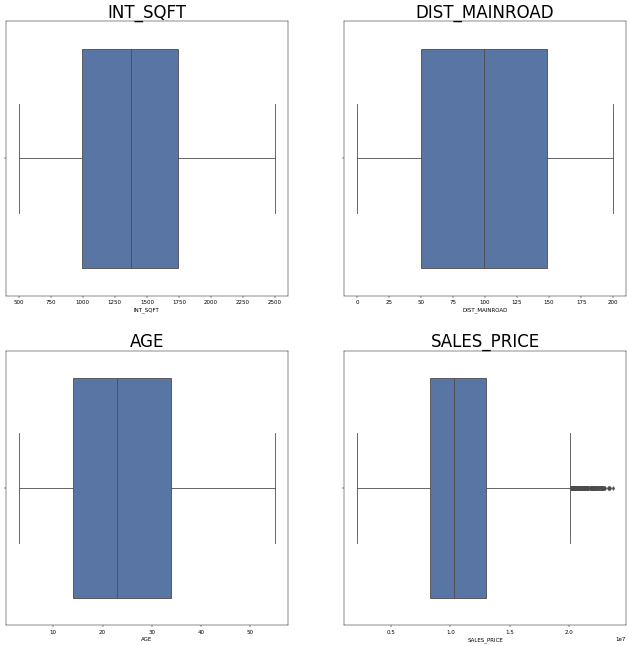

In [343]:
plt.figure(figsize=(20,20),dpi=40)
plt.subplot(2,2,1)
sns.boxplot(x=df['INT_SQFT'])
plt.title("INT_SQFT",fontsize=30)

plt.subplot(2,2,2)
sns.boxplot(x=df['DIST_MAINROAD'])
plt.title("DIST_MAINROAD")
plt.title("DIST_MAINROAD",fontsize=30)

plt.subplot(2,2,3)
sns.boxplot(x=df['AGE'])
plt.title("AGE")
plt.title("AGE",fontsize=30)

plt.subplot(2,2,4)
sns.boxplot(x=df['SALES_PRICE'])
plt.title("SALES_PRICE")
plt.title("SALES_PRICE",fontsize=30)

plt.show()

In [344]:
Q1 = df.SALES_PRICE.quantile(0.25)
Q2 = df.SALES_PRICE.quantile(0.75)
IQR=Q2-Q1
low=Q1-(1.5*IQR)
high=Q2+(1.5*IQR)
print("LOWER : ",low)
print("UPPER :",high)

LOWER :  1189400.0
UPPER : 20076600.0


In [345]:
df_high=df.loc[df['SALES_PRICE']>high]
df_low=df.loc[df['SALES_PRICE']>low]

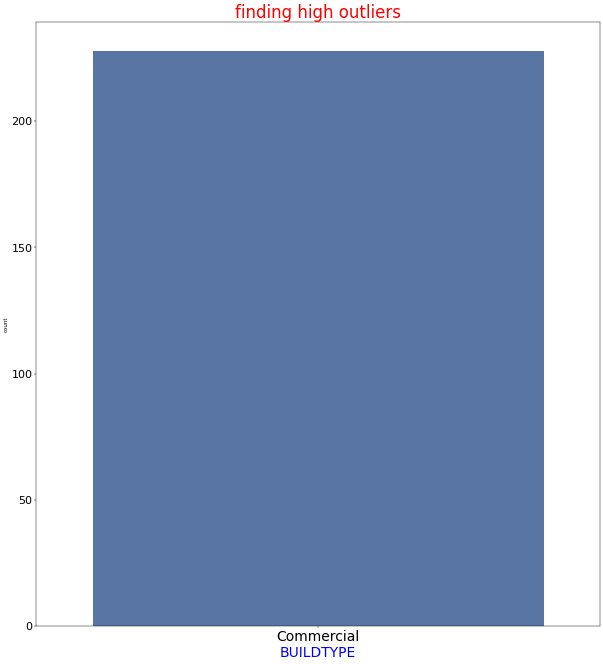

In [346]:
plt.figure(figsize=(40,20),dpi=40)

plt.subplot(1,2,1)
sns.countplot(x=df_high['BUILDTYPE'])
plt.xlabel('BUILDTYPE',fontsize=25,color='blue')
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.title('finding high outliers',fontsize=30,color='red')

# plt.subplot(1,2,2)
# ax=sns.countplot(x='AREA',hue='BUILDTYPE',data=df_low)
# plt.xticks(fontsize=20)
# plt.title('finding low outliers',fontsize=20)
# plt.yticks(fontsize=20)
# plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

plt.show()

From above figure the outliers seems to be valid. Commercial buildings will have higher salling price in common.

In [347]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

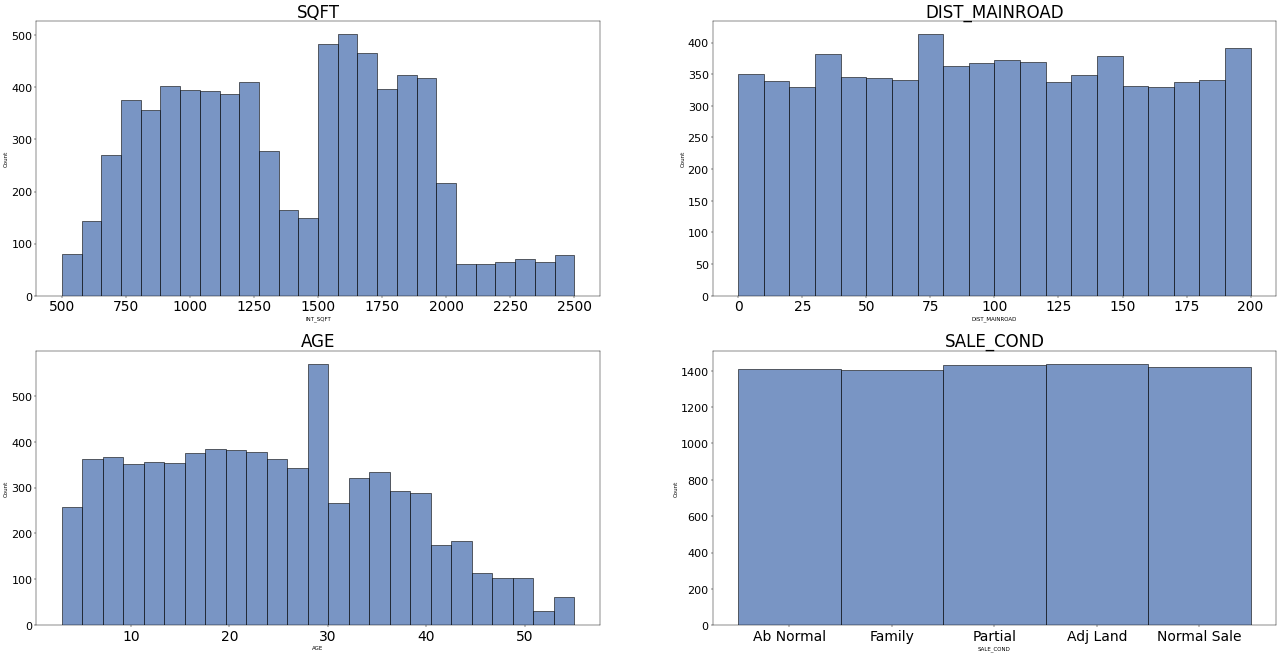

In [348]:
plt.figure(figsize=(40,20),dpi=40)
plt.style.use("seaborn-deep")
plt.subplot(2,2,1)
sns.histplot(data=df,x='INT_SQFT')
plt.title('SQFT',fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.title('SQFT',fontsize=30)

plt.subplot(2,2,2)
sns.histplot(data=df,x='DIST_MAINROAD')
plt.title('DIST_MAINROAD',fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.title('DIST_MAINROAD',fontsize=30)

plt.subplot(2,2,3)
sns.histplot(data=df,x='AGE')
plt.title('AGE',fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.title('AGE',fontsize=30)

plt.subplot(2,2,4)
sns.histplot(data=df,x='SALE_COND')
plt.title('SALE_COND',fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.title('SALE_COND',fontsize=30)


plt.show()

**1. SQFT is not following normal distribution**

**2. Distance to main road is uniformly distributed. Hence, there is no impact on sale price.**

**3. There are less number of sales happened for Aged properties (age more than 40)**

**4. Sale condition is uniformly distributed. Hence, there is no impact on sale price.**

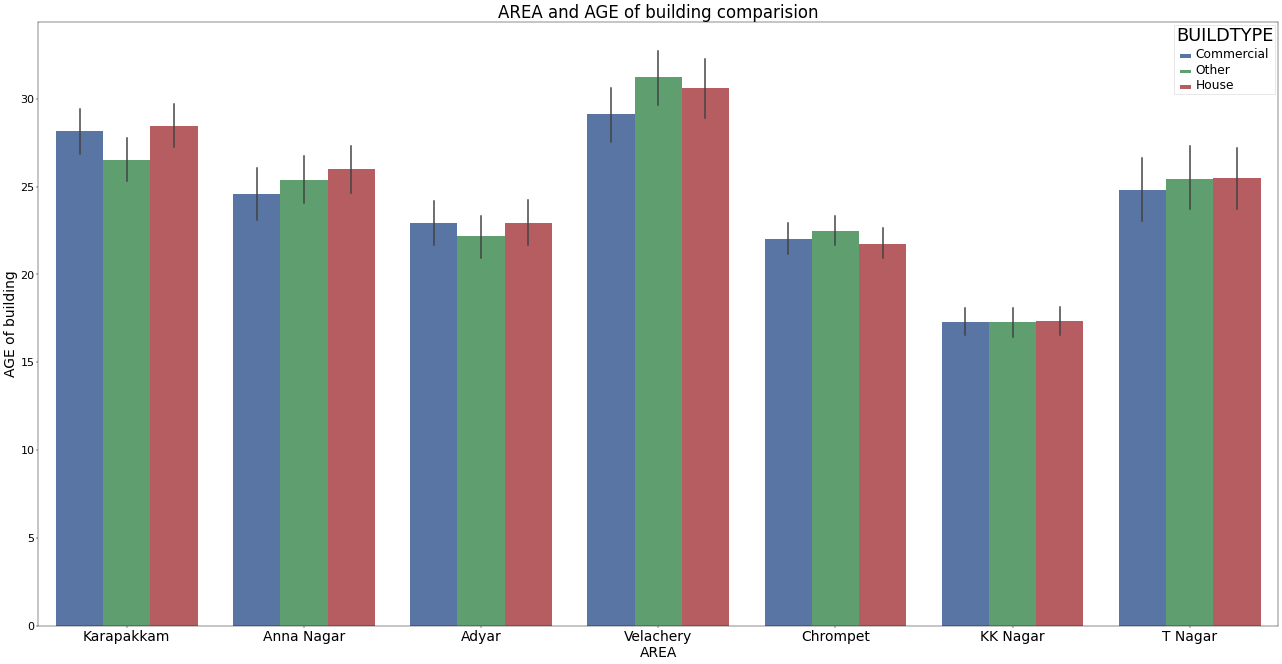

In [349]:
plt.figure(figsize=(40,20),dpi=40)
plt.style.use("seaborn-deep")
ax2=sns.barplot(data=df,x='AREA',y='AGE',hue='BUILDTYPE')
plt.title('AREA and AGE of building comparision',fontsize=30)
plt.xlabel('AREA',fontsize=25)
plt.ylabel('AGE of building',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.setp(ax2.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='32') # for legend title
plt.show()

1. Velachery and Karapakkam are having more aged buildings followed by Anna Nagar and T Nagar being almost same aged buildings.

2. KK Nagar is developing area. The age of buildings in KK Nagar is lesser compared to other Areas.

In [350]:
import plotly.express as px
px.histogram(df, x="BUILDTYPE", color="AREA", barmode='group')

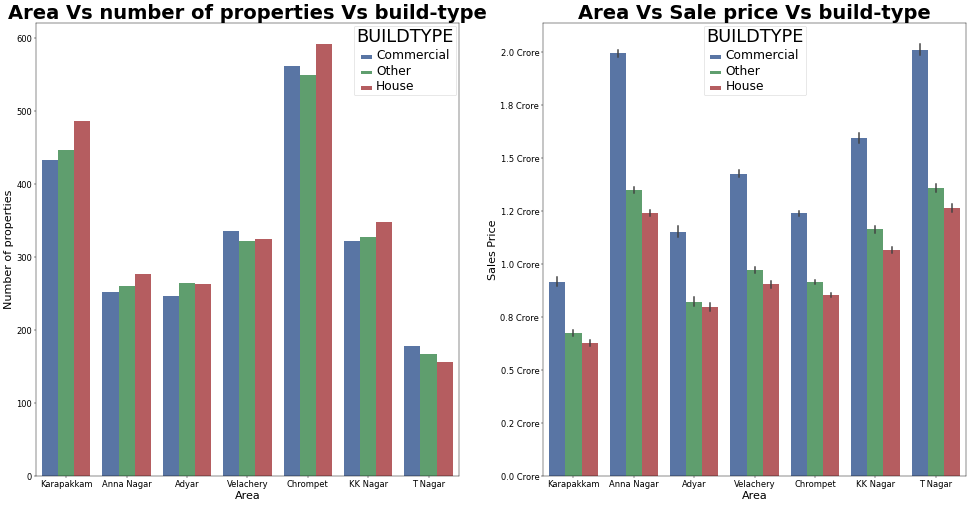

In [351]:
plt.figure(figsize=(30,15),dpi=40)
plt.style.use("seaborn-deep")
plt.subplot(1,2,1)
# plt.figure(figsize=(15,15),dpi=70)
ax1=sns.countplot(x='AREA',hue='BUILDTYPE',data=df)
plt.xlabel('Area',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Number of properties',fontsize=20)
plt.title('Area Vs number of properties Vs build-type',fontsize=35,fontweight="bold")
plt.setp(ax1.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='32') # for legend title
plt.subplot(1,2,2)

ax2=sns.barplot(x='AREA',y='SALES_PRICE',hue='BUILDTYPE',data=df)
plt.xlabel('Area',fontsize=20)
plt.ylabel('Sales Price',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Area Vs Sale price Vs build-type',fontsize=35,fontweight="bold")
import matplotlib.ticker as ticker
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: 
'{:,.1f}'.format(y/10000000) + ' Crore'))

plt.setp(ax2.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='32') # for legend title
plt.show()

1. Chrompet and Karapakkam are having more number of buildings.
2. The houses with higher sale prices are located in T Nagar, Anna Nagar and KK Nagar. These areas are seems to be porche areas.

[None, None]

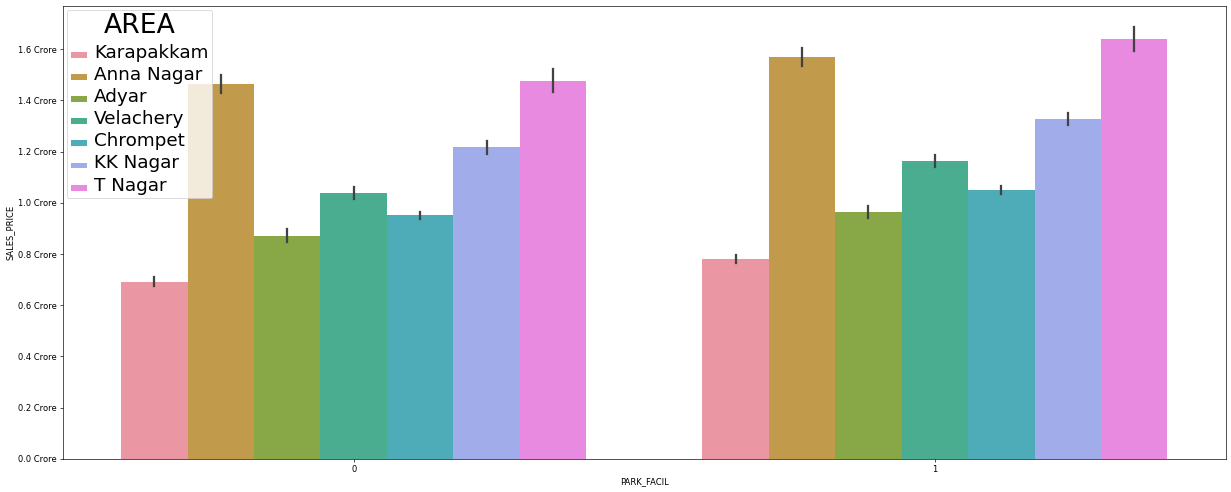

In [352]:
plt.figure(figsize=(25,10),dpi=60)
ax=sns.barplot(data=df,x='PARK_FACIL',y="SALES_PRICE",hue='AREA')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.1f}'.format(y/10000000) + ' Crore'))
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

**PARK FACILITY has no impact on Sales. Strange!!!**



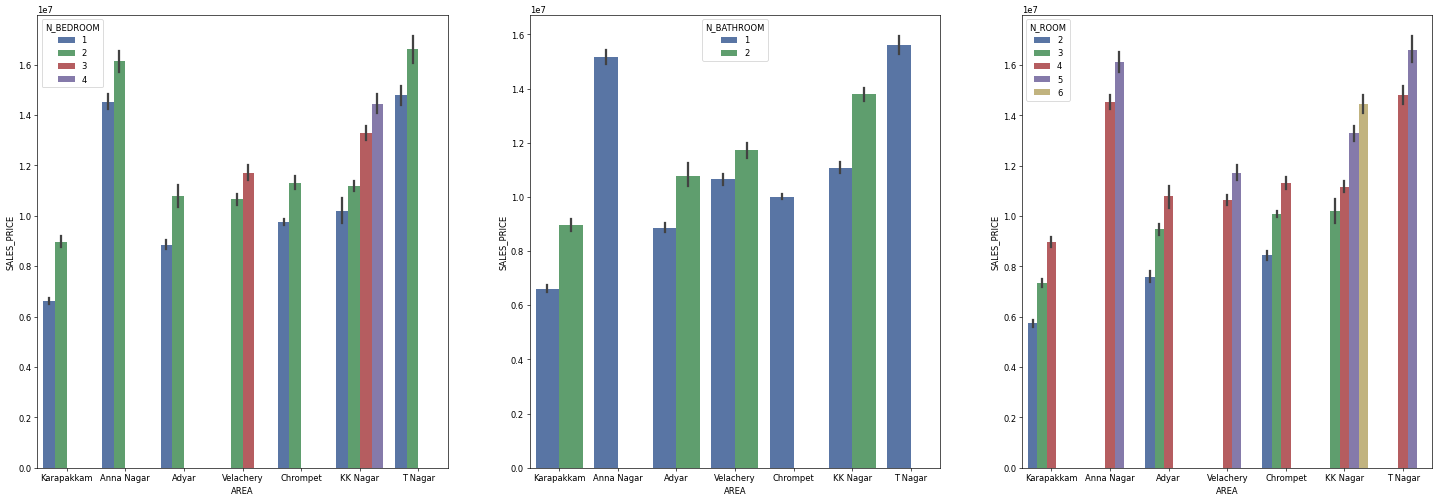

In [353]:
plt.figure(figsize=(30,10),dpi=60)
plt.subplot(1,3,1)
sns.barplot(data=df,x='AREA',y="SALES_PRICE",hue='N_BEDROOM')

plt.subplot(1,3,2)
sns.barplot(data=df,x='AREA',y="SALES_PRICE",hue='N_BATHROOM')

plt.subplot(1,3,3)
sns.barplot(data=df,x='AREA',y="SALES_PRICE",hue='N_ROOM')

plt.show()

**Bed Rooms**
1. On the basis of sales. Anna nagar and T nagar sales price is very high for 1 and 2 bedrooms.
2. In Karapakkam, 1 and 2 bedroom houses sales price is lower compared to other areas..


**Bathrooms**
1. Again Anna Nagar and T Nagar whcih are having only 1 bathroom have the highest sale price. all these factors are pointing that these areas are very costly areas.

**Rooms**

1. Anna Nagar and T Nagar with 4 and 5 rooms are the costliest houses.
2. Karapakkam with 2,3 and 4 rooms houses are the cheapest.

**Conclusion:**
1. T nagar and Anna Nagar are the costliest areas.
2. KK Nagar is having all types of bedrooms, bathrooms and rooms with average sale prices among all other areas and the age of buildings are lowest compared to other areas.
3. KK Nagar is the only area with 6 rooms houses.
4. In Karapakkam there are high number of buildings with higher age and lowest sale price. 
5. Number of bedrooms, bathrooms and rooms impact the sale price according to the areas.


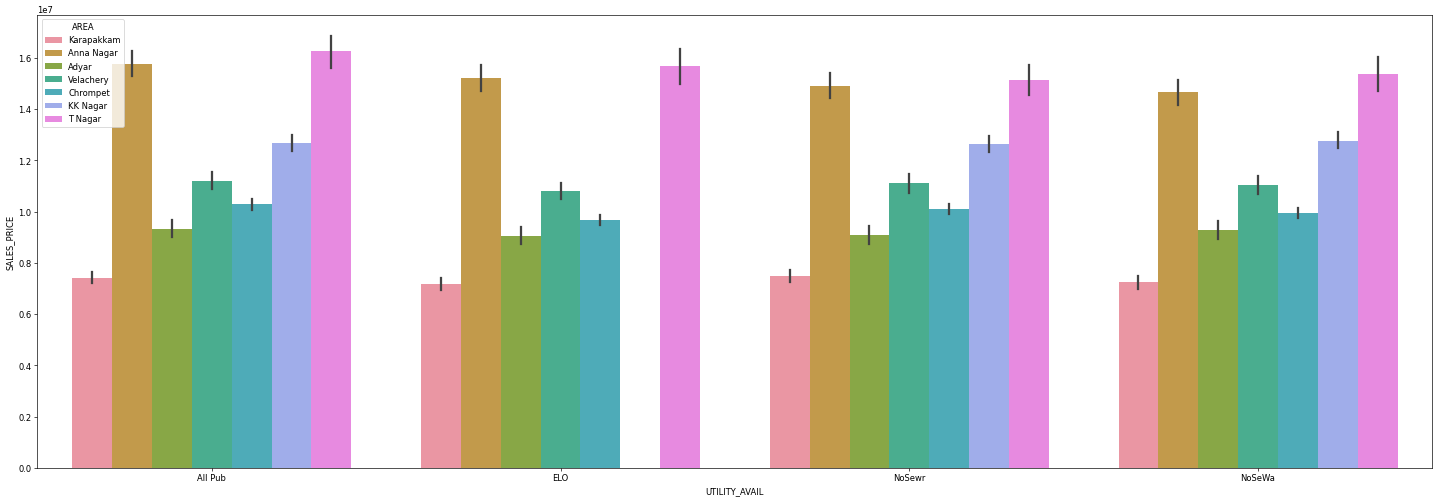

In [354]:
plt.figure(figsize=(30,10),dpi=60)
sns.barplot(data=df,x='UTILITY_AVAIL',y="SALES_PRICE",hue='AREA')

**KK Nagar have no ELO utility.**


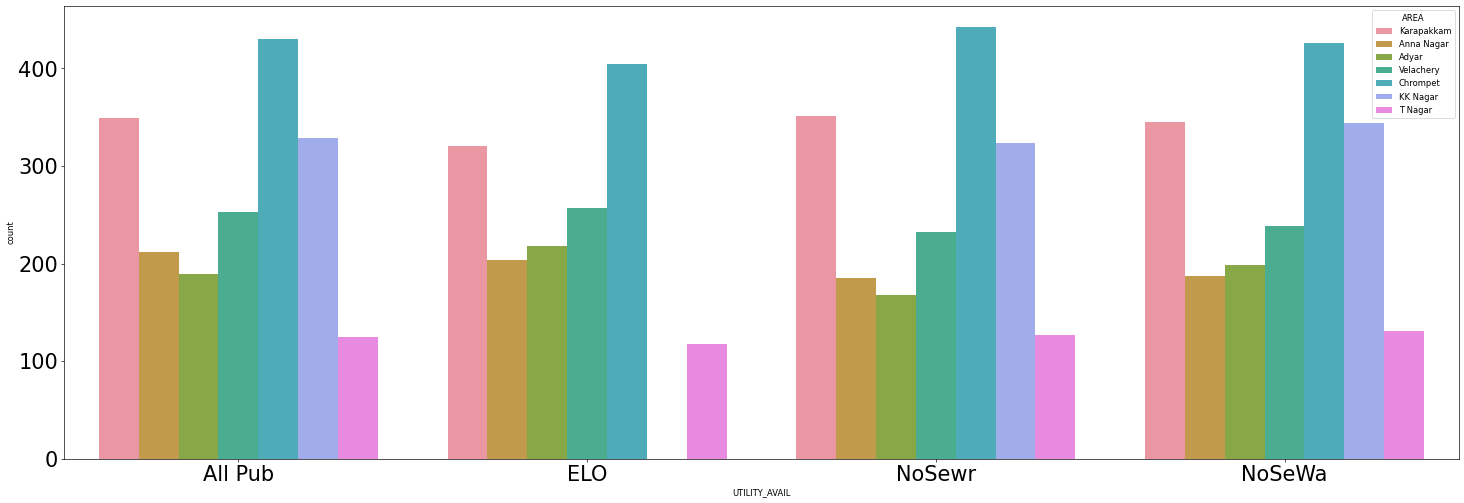

In [355]:
plt.figure(figsize=(30,10),dpi=60)
sns.countplot(data=df,x='UTILITY_AVAIL',hue='AREA')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

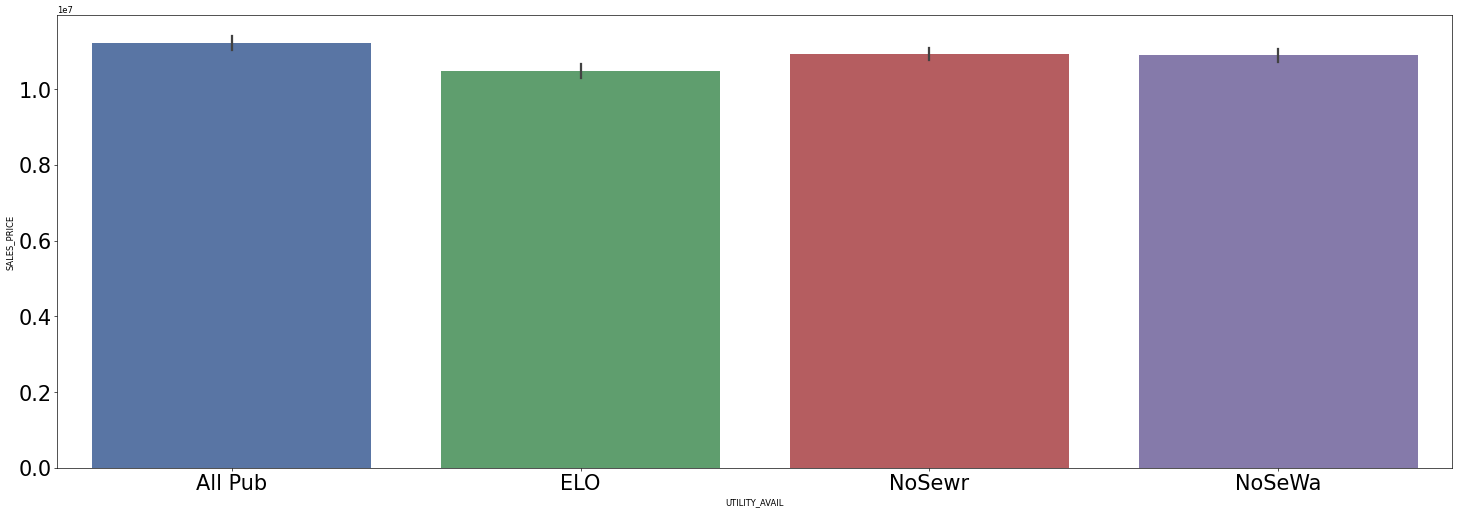

In [356]:
plt.figure(figsize=(30,10),dpi=60)
sns.barplot(data=df,x='UTILITY_AVAIL',y='SALES_PRICE')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

**There are more buildings with NoSewr utility.**

**But the sale price of all utilities are almost equal.**

**Chrompet have higher sale compared to others in all utilities. It have also more number of buildings. the second area after chrompet is Karapakkam.**

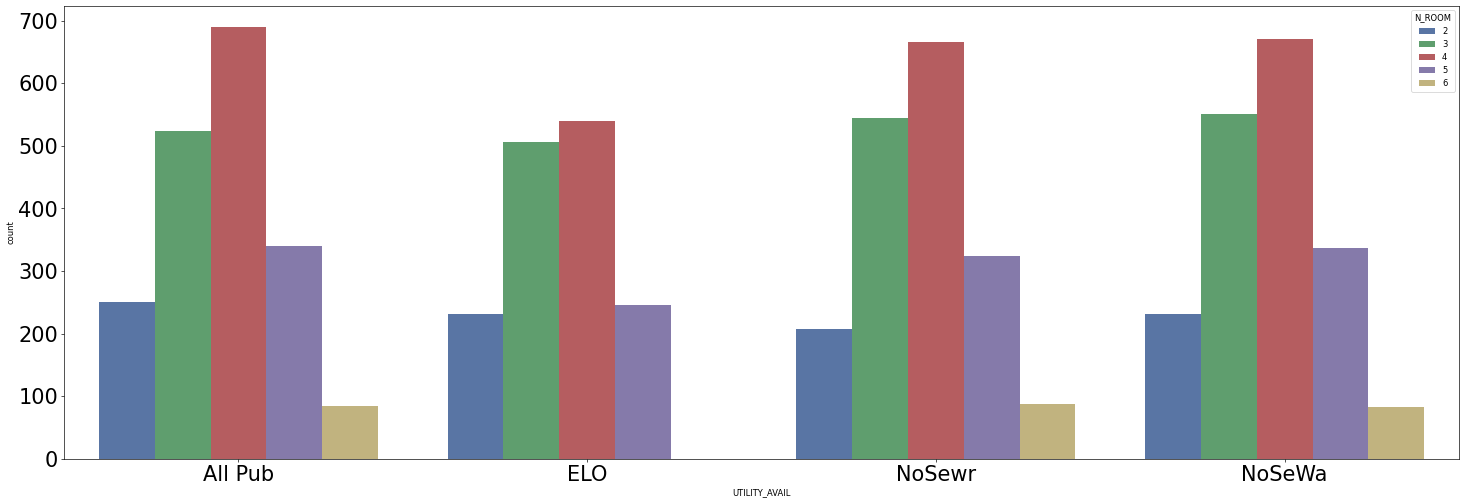

In [357]:
plt.figure(figsize=(30,10),dpi=60)
sns.countplot(data=df,x='UTILITY_AVAIL',hue='N_ROOM')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

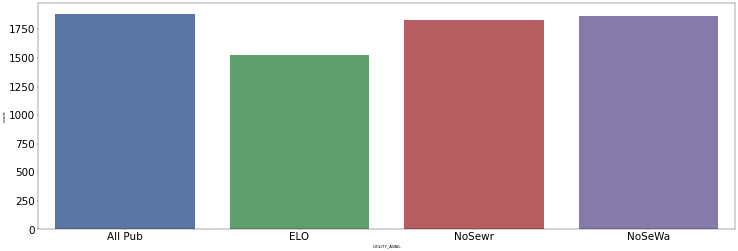

In [358]:
plt.figure(figsize=(30,10),dpi=30)
sns.countplot(data=df,x='UTILITY_AVAIL')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

**houses with 6 rooms which are only in KK nagar have no ELO utility . Hence the data is valid.**

**NoSewr have the highest sale in among all utilities**

In [359]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

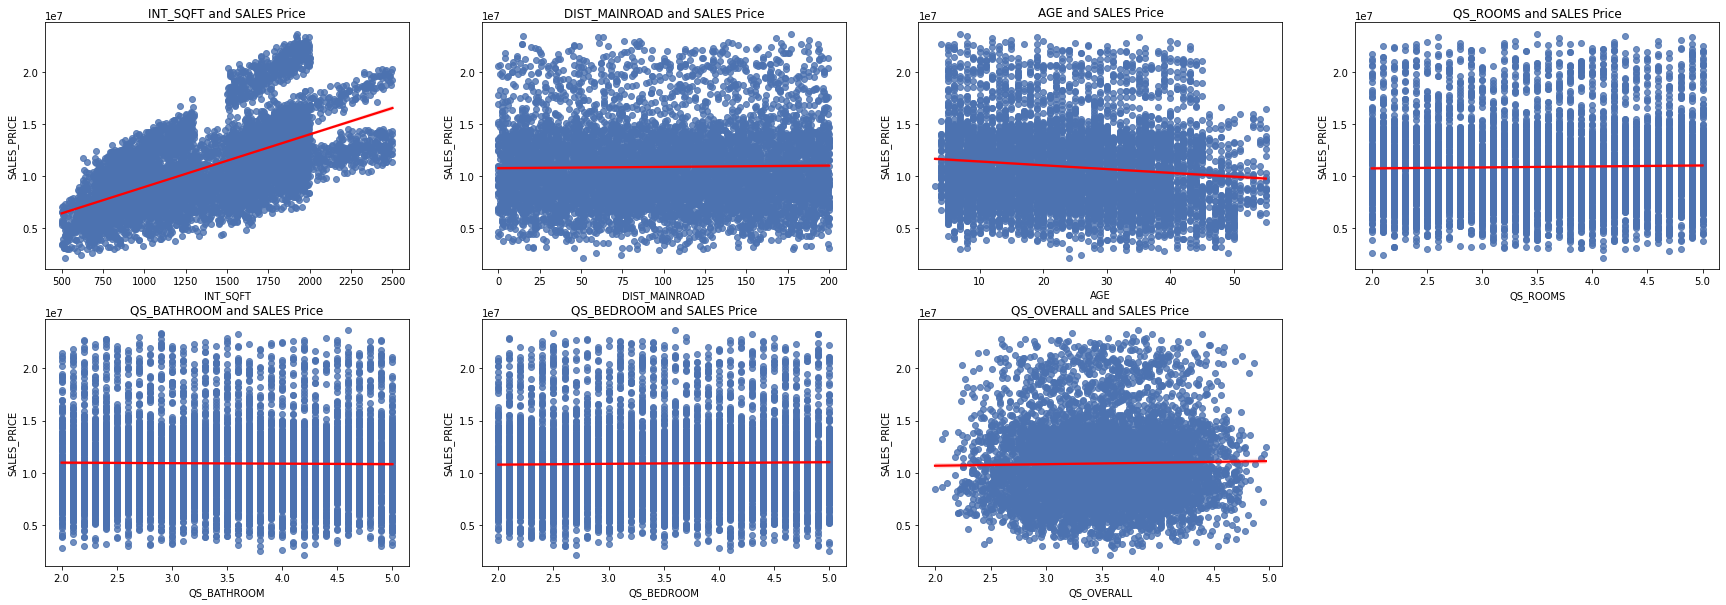

In [360]:
plt.figure(figsize=(30,10))
plt.subplot(2,4,1)
sns.regplot(x=df['INT_SQFT'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.title('INT_SQFT and SALES Price')

plt.subplot(2,4,2)
sns.regplot(x=df['DIST_MAINROAD'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.title('DIST_MAINROAD and SALES Price')

plt.subplot(2,4,3)
sns.regplot(x=df['AGE'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.title('AGE and SALES Price')

plt.subplot(2,4,4)
sns.regplot(x=df['QS_ROOMS'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.title('QS_ROOMS and SALES Price')

plt.subplot(2,4,5)
sns.regplot(x=df['QS_BATHROOM'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.title('QS_BATHROOM and SALES Price')

plt.subplot(2,4,6)
sns.regplot(x=df['QS_BEDROOM'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.title('QS_BEDROOM and SALES Price')

plt.subplot(2,4,7)
sns.regplot(x=df['QS_OVERALL'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.title('QS_OVERALL and SALES Price')

plt.show()

**1. Sale increases with SQFT. Linear relation with sale.**

**2. Disance from mainroad have no impact on sales**

**3. Age have minimum impact on sale**

**4. QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL have no impact on sales**

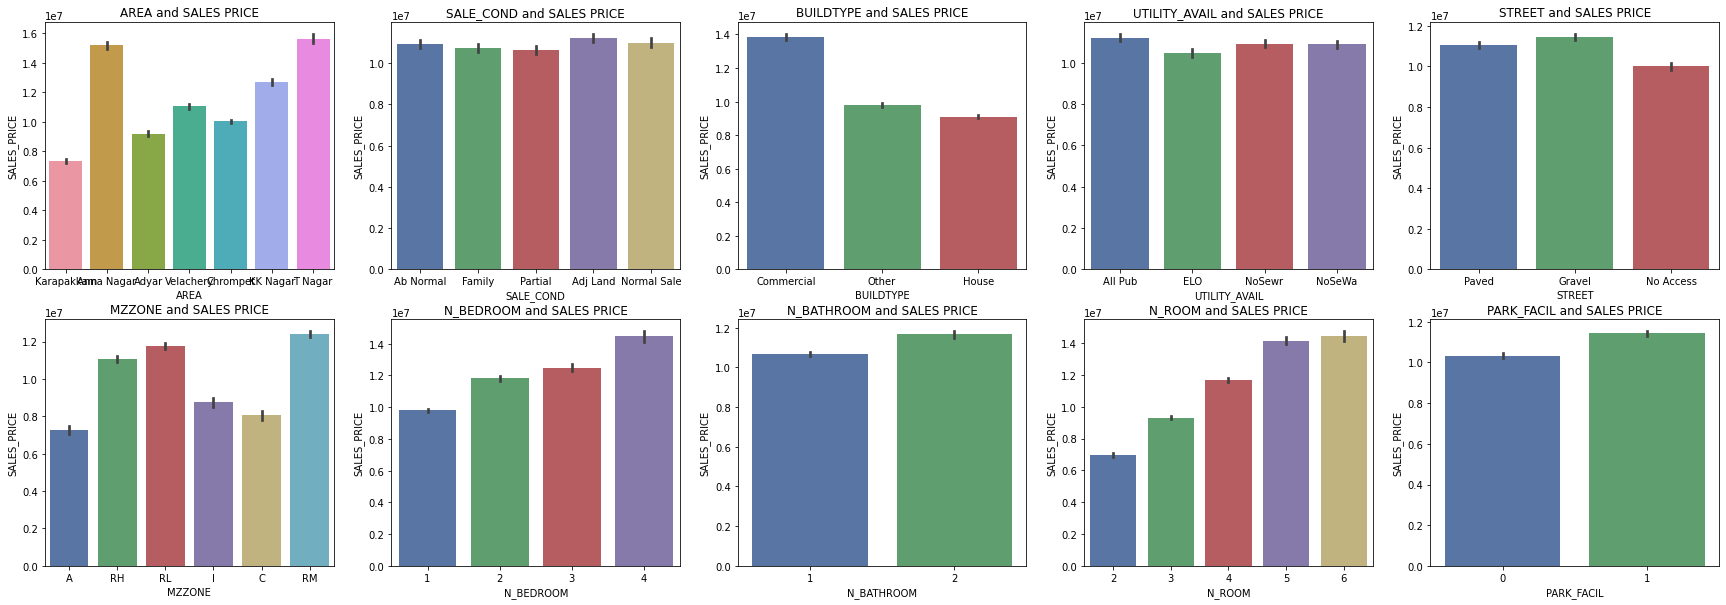

In [361]:
plt.figure(figsize=(30,10))
plt.subplot(2,5,1)
sns.barplot(data=df,x='AREA',y='SALES_PRICE')
plt.title('AREA and SALES PRICE')

plt.subplot(2,5,2)
sns.barplot(data=df,x='SALE_COND',y='SALES_PRICE')
plt.title('SALE_COND and SALES PRICE')

plt.subplot(2,5,3)
sns.barplot(data=df,x='BUILDTYPE',y='SALES_PRICE')
plt.title('BUILDTYPE and SALES PRICE')

plt.subplot(2,5,4)
sns.barplot(data=df,x='UTILITY_AVAIL',y='SALES_PRICE')
plt.title('UTILITY_AVAIL and SALES PRICE')

plt.subplot(2,5,5)
sns.barplot(data=df,x='STREET',y='SALES_PRICE')
plt.title('STREET and SALES PRICE')

plt.subplot(2,5,6)
sns.barplot(data=df,x='MZZONE',y='SALES_PRICE')
plt.title('MZZONE and SALES PRICE')

plt.subplot(2,5,7)
sns.barplot(data=df,x='N_BEDROOM',y='SALES_PRICE')
plt.title('N_BEDROOM and SALES PRICE')

plt.subplot(2,5,8)
sns.barplot(data=df,x='N_BATHROOM',y='SALES_PRICE')
plt.title('N_BATHROOM and SALES PRICE')

plt.subplot(2,5,9)
sns.barplot(data=df,x='N_ROOM',y='SALES_PRICE')
plt.title('N_ROOM and SALES PRICE')

plt.subplot(2,5,10)
sns.barplot(data=df,x='PARK_FACIL',y='SALES_PRICE')
plt.title('PARK_FACIL and SALES PRICE')

plt.show()

Text(0.5, 1.0, 'AREA demands')

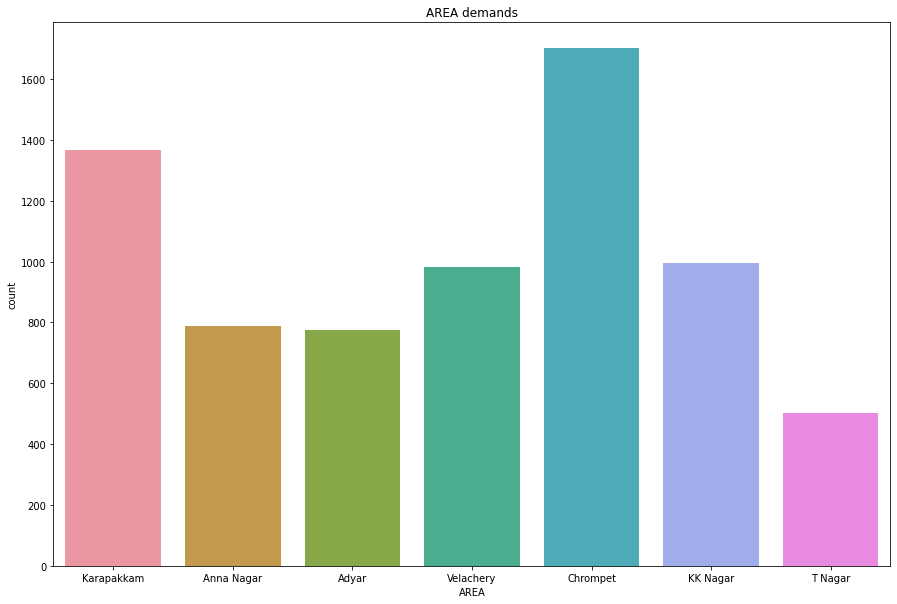

In [362]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='AREA')
plt.title('AREA demands')

**1. T Nagar is least in demand but the costliest Area**

**2. Area, SQFT,  MZ Zone, N_ROOM, N_BEDROOM, STREET have linear relationship with TOTAL_SALE_PRICE.**

# Ordinal label encoding columns are:

**Area, MZ zone, SALE condition and street**

# ONE HOT encoding columns are:

**Utilities and Buildtype**

# Lets find correlations of features

**Cross checking the assumption with heatmap correlation**

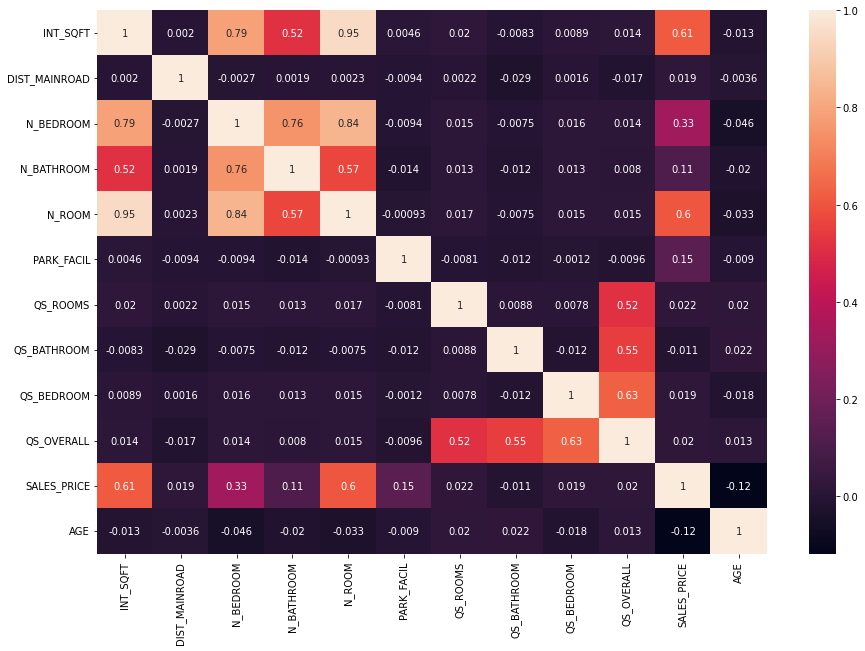

In [363]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Hence, SQFT, N_Bedrooms, N_rooms are having linearity with SALE price. as we have thought.**

**Now lets encode the other categorical data to check the correlation with sale price**



---



---



1. One hot encoding of Buildtype and utilities


In [364]:
df_1=pd.get_dummies(df,columns=['BUILDTYPE'])
df_1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,Karapakkam,1004,131,1,1,3,Ab Normal,1,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,Anna Nagar,1986,26,2,1,5,Ab Normal,0,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,Adyar,909,70,1,1,3,Ab Normal,1,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,Velachery,1855,14,3,2,5,Family,0,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,Karapakkam,1226,84,1,1,3,Ab Normal,1,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,Adj Land,0,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,49,0,0,1
7105,Velachery,1897,52,3,2,5,Family,1,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,9,0,0,1
7106,Velachery,1614,152,2,1,4,Normal Sale,0,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,28,0,1,0
7107,Karapakkam,787,40,1,1,2,Partial,1,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,32,1,0,0


2. Label encoding of Area, sale condition, utility, street, mzone

In [365]:
df_1["AREA"] = df_1["AREA"].map({"Karapakkam": 0,"Adyar": 1, "T Nagar": 6, "Chrompet": 2, "Velachery": 3, "Anna Nagar" : 5,"KK Nagar" : 4})

df_1["SALE_COND"] = df_1["SALE_COND"].map({"Partial": 0,"Family": 1,"Ab Normal": 2, "Normal Sale": 3,"Adj Land" : 4})

df_1["UTILITY_AVAIL"] = df_1["UTILITY_AVAIL"].map({"ELO": 0, "NoSeWa": 1, "NoSewr" : 2, "All Pub": 3})

df_1["STREET"] = df_1["STREET"].map({"No Access": 0,"Paved": 1, "Gravel": 2})

df_1["MZZONE"] = df_1["MZZONE"].map({"A": 0,"C": 1, "I": 2, "RH": 3, "RL": 4, "RM" : 5})

**Removing columns which are not linear with sales**

**all QS columns can be removed to build a linear model**

**Dist from main road, AGE, N_bathrooms and UTILITY_AVAIL have very less linearity with sales. but it can impact on sales hence keeping them**

In [366]:
df_1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'SALES_PRICE', 'AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Other'],
      dtype='object')

In [367]:
# df_1 = df_1.drop(["QS_BEDROOM", "QS_BATHROOM", "QS_ROOMS", "QS_OVERALL","DIST_MAINROAD","AGE","N_BATHROOM","PARK_FACIL", "SALE_COND"], axis = 1)

In [368]:
df_1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'SALES_PRICE', 'AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Other'],
      dtype='object')

#**Defining features and target**

In [369]:
x=df_1[['AREA', 'INT_SQFT', 'N_BEDROOM','N_ROOM','SALE_COND','STREET','MZZONE', 'BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Other','PARK_FACIL','UTILITY_AVAIL']].values
y=df_1['SALES_PRICE'].values

#**Linear Regression Model**

**split**

In [370]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=25)


**Scale**

In [371]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Model**

In [372]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)


LinearRegression()

In [373]:
y_pred_lreg=lreg.predict(x_test)

In [374]:
from sklearn.metrics import r2_score
r2_linear=round((r2_score(y_test,y_pred_lreg)),3)*100
print(f'R2 score of linear regression model is: {r2_linear}%')

R2 score of linear regression model is: 92.0%


# **KNN Model**

for k as 1 the training scoe is: 0.9999935224220087 and the cross val score is: 0.9306966453285176
for k as 2 the training scoe is: 0.9829991395618665 and the cross val score is: 0.9481366220656746
for k as 3 the training scoe is: 0.9780282963058606 and the cross val score is: 0.95258155222298
for k as 4 the training scoe is: 0.9746375556754201 and the cross val score is: 0.9542268665791065
for k as 5 the training scoe is: 0.9721495239360977 and the cross val score is: 0.9540272638761248
for k as 6 the training scoe is: 0.969860648153864 and the cross val score is: 0.9547050347140515
for k as 7 the training scoe is: 0.9683508533201468 and the cross val score is: 0.9540757766085919
for k as 8 the training scoe is: 0.9671173923448916 and the cross val score is: 0.9533678801066957
for k as 9 the training scoe is: 0.965625617491321 and the cross val score is: 0.9522998994808501
for k as 10 the training scoe is: 0.9637185158862346 and the cross val score is: 0.9511350101644362


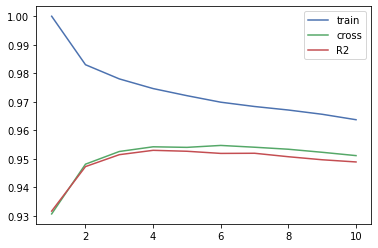

In [375]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
A=[]
B=[]
C=[]
K=[1,2,3,4,5,6,7,8,9,10]
for k in K:
  knn=KNeighborsRegressor(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  train_score=knn.score(x_train,y_train)
  cross_val=np.mean(cross_val_score(knn,x_train,y_train,cv=10))
  print(f'for k as {k} the training scoe is: {train_score} and the cross val score is: {cross_val}')
  test_score=r2_score(y_test,y_pred)
  A.append(train_score)
  B.append(cross_val)
  C.append(test_score)
plt.plot(K,A,label='train')
plt.plot(K,B,label='cross')
plt.plot(K,C,label='R2')
plt.legend()
plt.show()

**K=6 is the best value of K.**

In [376]:
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
score=r2_score(y_test,y_pred)
r2_knn=round((score)*100,1)
print(f'for k as 4 the R2 score is: {r2_knn}%')

for k as 4 the R2 score is: 95.3%


**Descesion Tree regressor**

In [377]:
from sklearn.tree import DecisionTreeRegressor

In [378]:
dep=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for d in dep:
  dt=DecisionTreeRegressor(max_depth=d)
  dt.fit(x_train,y_train)
  y_pred=dt.predict(x_test)
  # score=r2_score(y_test,y_pred)
  t_score=dt.score(x_train,y_train)
  print(f'for depth {d} train score is: {t_score} , the cross val score is: {np.mean(cross_val_score(dt, x_train, y_train, cv=10))}')

for depth 1 train score is: 0.36256989128783146 , the cross val score is: 0.3608383322422103
for depth 2 train score is: 0.6897442206569594 , the cross val score is: 0.688344551031111
for depth 3 train score is: 0.8055993486417207 , the cross val score is: 0.8044670138542168
for depth 4 train score is: 0.8884684385199955 , the cross val score is: 0.8828412089831842
for depth 5 train score is: 0.9235231813128293 , the cross val score is: 0.9161841880257062
for depth 6 train score is: 0.9444218350648329 , the cross val score is: 0.9369164013643898
for depth 7 train score is: 0.9604219587391817 , the cross val score is: 0.9506713355766282
for depth 8 train score is: 0.9728733576049553 , the cross val score is: 0.9603412950064442
for depth 9 train score is: 0.9825452443241992 , the cross val score is: 0.9677314961286234
for depth 10 train score is: 0.9892247333906353 , the cross val score is: 0.9717530122541402
for depth 11 train score is: 0.9937550352745905 , the cross val score is: 0.972

**Max Depth 12 is the best value**

In [379]:
dt=DecisionTreeRegressor(max_depth=13)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
score=r2_score(y_test,y_pred)
r2_dt=round(((score)*100),1)
print(f'r2 score for decision tree is: {r2_dt}%')

r2 score for decision tree is: 97.3%


**Random Forest**

In [380]:
from sklearn.ensemble import RandomForestRegressor
maxd=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for m in maxd:
  rf=RandomForestRegressor(n_estimators=100,max_depth=m,max_features='auto')
  rf.fit(x_train,y_train)
  train_sc=rf.score(x_train,y_train)
  y_pred=rf.predict(x_test)
  r2sc=r2_score(y_test,y_pred)
  print(f'When MAX Depth is: {m}, the train score is: {round((train_sc)*100,4)}% and cross val score is: {np.mean(cross_val_score(dt, x_train, y_train, cv=10))}')

When MAX Depth is: 1, the train score is: 36.2568% and cross val score is: 0.9733009668370123
When MAX Depth is: 2, the train score is: 68.974% and cross val score is: 0.972725831319031
When MAX Depth is: 3, the train score is: 81.2778% and cross val score is: 0.9725976220314625
When MAX Depth is: 4, the train score is: 89.8234% and cross val score is: 0.9730542066173602
When MAX Depth is: 5, the train score is: 93.5028% and cross val score is: 0.973040382584583
When MAX Depth is: 6, the train score is: 95.7229% and cross val score is: 0.9729465912589094
When MAX Depth is: 7, the train score is: 97.2668% and cross val score is: 0.9730779862040286
When MAX Depth is: 8, the train score is: 98.2983% and cross val score is: 0.9730212628321923
When MAX Depth is: 9, the train score is: 98.9651% and cross val score is: 0.9730025717265569
When MAX Depth is: 10, the train score is: 99.3574% and cross val score is: 0.9732433074677477
When MAX Depth is: 11, the train score is: 99.5849% and cross 

 lets take max depth 8

In [381]:
rf=RandomForestRegressor(n_estimators=100,max_depth=8,max_features='auto')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2_rf=round((r2_score(y_test,y_pred))*100,2)
print(f'R2 score of Random forest regressor is: {r2_rf}%')

R2 score of Random forest regressor is: 97.52%


In [382]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,0.8,0.9,1]:
  xg = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity=0) # initialise the model
  xg.fit(x_train,y_train)
  sc=xg.score(x_train,y_train)
  print("Learning rate : ", lr, " Train score : ",sc , " Cross-Val score : ", np.mean(cross_val_score(xg, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.36742395819133256  Cross-Val score :  -0.37460890989973417
Learning rate :  0.02  Train score :  0.7492273365187889  Cross-Val score :  0.7456832377059872
Learning rate :  0.03  Train score :  0.9261145696982451  Cross-Val score :  0.9233064418513525
Learning rate :  0.04  Train score :  0.962969057393839  Cross-Val score :  0.9607954407296365
Learning rate :  0.05  Train score :  0.9747821531918825  Cross-Val score :  0.9726997449778846
Learning rate :  0.06  Train score :  0.9805140990261086  Cross-Val score :  0.9784227949676071
Learning rate :  0.07  Train score :  0.9843184239927893  Cross-Val score :  0.9826372348313932
Learning rate :  0.08  Train score :  0.9872750884340299  Cross-Val score :  0.9855675935068474
Learning rate :  0.09  Train score :  0.989501676042205  Cross-Val score :  0.9875733370364068
Learning rate :  0.1  Train score :  0.9911001405022932  Cross-Val score :  0.9891804826771402
Learning rate :  0.11  Train score :  0

**Best learning rate is 0.7**

In [383]:
xg = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity=0)
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
r2scxg=round((r2_score(y_test,y_pred))*100,1)
print(f'R2 of XG boost model is: {r2scxg}%')

R2 of XG boost model is: 99.4%


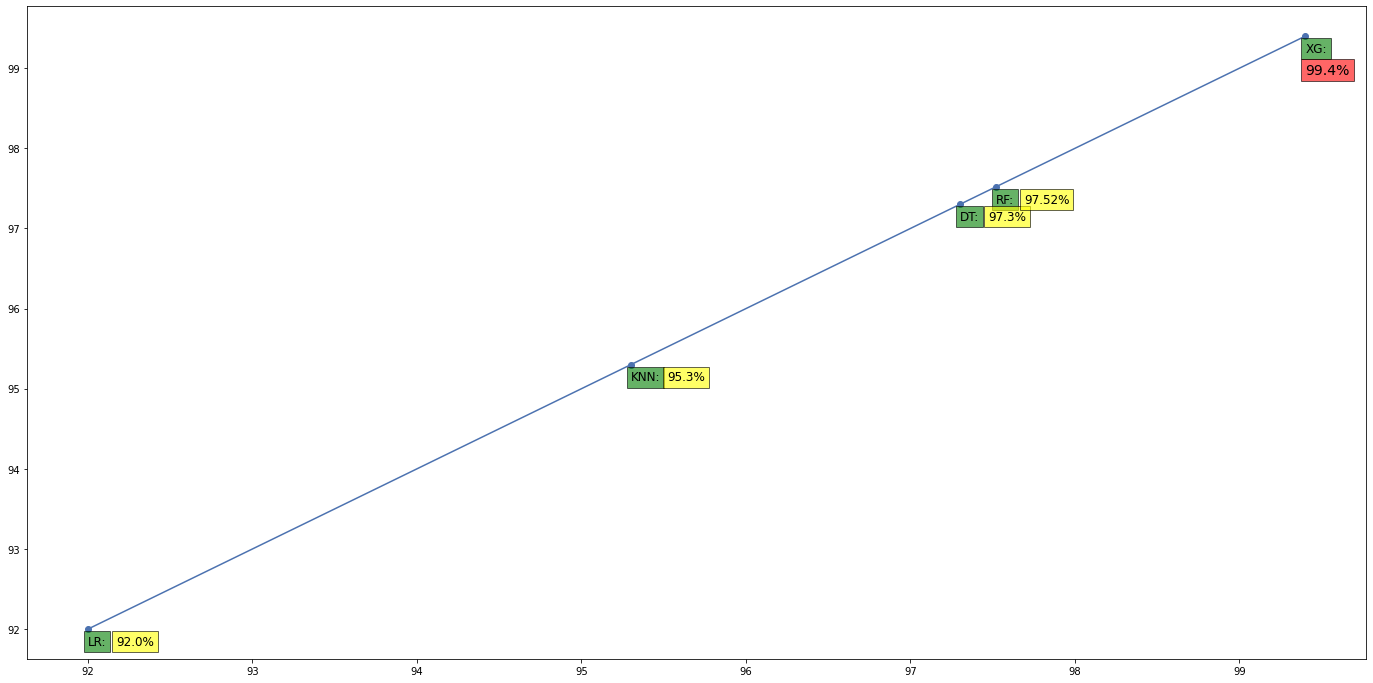

In [384]:
scores=[r2_linear,r2_knn,r2_dt,r2_rf,r2scxg]
text=['LR:','KNN:','DT:','RF:','XG:']

t=[r2_linear,r2_knn,r2_dt,r2_rf,r2scxg]
plt.figure(figsize=(24,12))
plt.scatter(t,scores)
plt.plot(t,scores)
for i in range(len(t)):
  plt.annotate(text[i], (t[i], scores[i] - 0.2),fontsize=12,bbox=dict(facecolor='green', alpha=0.6))
for i in range(len(t)):
  if i>3:
    plt.text(t[i],scores[i]-0.47,str(scores[i])+'%',fontsize=14,bbox=dict(facecolor='red', alpha=0.6))
  elif i==1:
    plt.text(t[i]+0.22,scores[i]-0.2,str(scores[i])+'%',fontsize=12,bbox=dict(facecolor='yellow', alpha=0.6))
  else:
    plt.text(t[i]+0.17,scores[i]-0.2,str(scores[i])+'%',fontsize=12,bbox=dict(facecolor='yellow', alpha=0.6))
plt.show()

# **Best R2 score is 99.4% by XG Boost model**